<a href="https://colab.research.google.com/github/xHexlabx/AI-models/blob/main/Mnist%20Classification/Mnist_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP image classification


In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
datasets = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
(xtrain , ytrain) , (xtest , ytest) = datasets

In [4]:
print(xtrain.shape , ytrain.shape , xtest.shape , ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
ytrain[0]

5

In [6]:
xtrain = xtrain.reshape([-1 , 28 * 28])
xtest  = xtest.reshape(-1 , 28 * 28)

In [7]:
#normalize
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [8]:
#one-hot encoding 
ytrain = tf.keras.utils.to_categorical(ytrain , num_classes = 10 , dtype = 'float32')
ytest = tf.keras.utils.to_categorical(ytest , num_classes= 10 , dtype = 'float32')

In [9]:
print(xtrain.shape , ytrain.shape , xtest.shape , ytest.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256 , input_shape = (28 * 28 , ) , activation = 'relu'))
model.add(tf.keras.layers.Dense(256 , activation = 'relu'))
model.add(tf.keras.layers.Dense(10 , activation = 'softmax'))
model.compile(loss = 'mse' , optimizer = 'sgd' , metrics = 'accuracy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(xtrain , ytrain , epochs = 50 , validation_data = (xtest , ytest))

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0886 - accuracy: 0.1863 - val_loss: 0.0853 - val_accuracy: 0.2898
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0813 - accuracy: 0.3834 - val_loss: 0.0760 - val_accuracy: 0.5141
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0701 - accuracy: 0.6288 - val_loss: 0.0624 - val_accuracy: 0.7198
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0551 - accuracy: 0.7467 - val_loss: 0.0463 - val_accuracy: 0.7890
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0408 - accuracy: 0.8081 - val_loss: 0.0343 - val_accuracy: 0.8365
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0319 - accuracy: 0.8393 - val_loss: 0.0277 - val_accuracy: 0.8555
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0268 - accuracy: 0.8571 - val_loss: 0.0238 - val_accuracy:

In [17]:
z = model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [19]:
print(np.sum(z.argmax(axis = 1) == ytest.argmax(axis = 1)) / len(ytest) * 100 , '%')

93.78999999999999 %


In [24]:
ytest[0].argmax()

7

In [28]:
z[0].argmax()

7

# CNN image classification

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [22]:
datasets = tf.keras.datasets.mnist.load_data()
(xtrain  , ytrain) , (xtest , ytest) = datasets

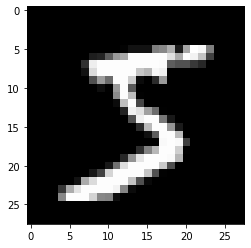

In [23]:
plt.imshow(xtrain[0] , cmap = 'gray')
plt.show()

In [24]:
#normalize
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [25]:
xtrain.shape

(60000, 28, 28)

In [26]:
xtrain = xtrain[ : , : , : , None] ;
xtest = xtest[ : , : , : , None]

In [27]:
#resize
xtrain = tf.image.resize(xtrain , (32 , 32) )
xtest = tf.image.resize(xtest ,(32 , 32) )

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16 , (5 , 5) , input_shape = (32 , 32 , 1), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(8 , (5 , 5) , activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128 , activation = 'relu'))
model.add(tf.keras.layers.Dense(64 , activation  = 'relu'))
model.add(tf.keras.layers.Dense(10 , activation  = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'sgd' , metrics = 'accuracy')
#sparse no need to one-hot encoding 

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 8)         3208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 128)              

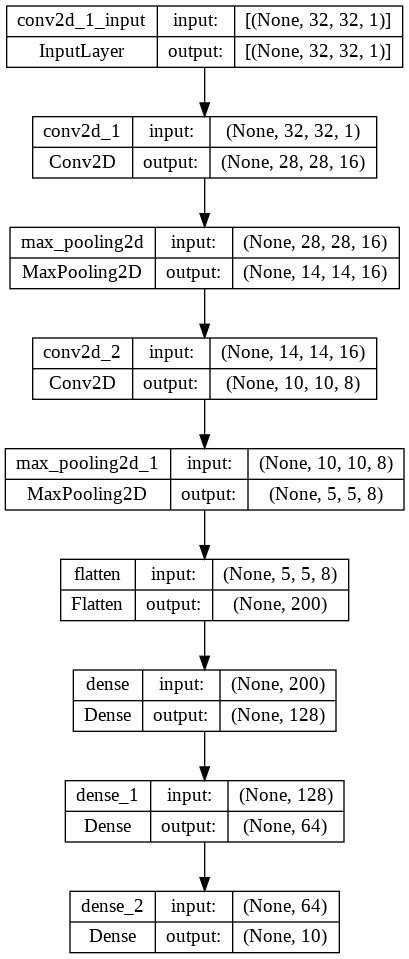

In [37]:
tf.keras.utils.plot_model(model , show_shapes = True)

In [39]:
model.fit(xtrain , ytrain , epochs = 50 , validation_data = (xtest, ytest))

Epoch 1/50
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4837 - accuracy: 0.8512 - val_loss: 0.1662 - val_accuracy: 0.9499
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1323 - accuracy: 0.9596 - val_loss: 0.1084 - val_accuracy: 0.9678
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0981 - accuracy: 0.9703 - val_loss: 0.0772 - val_accuracy: 0.9758
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0824 - accuracy: 0.9746 - val_loss: 0.0765 - val_accuracy: 0.9766
Epoch 5/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0712 - accuracy: 0.9780 - val_loss: 0.0626 - val_accuracy: 0.9792
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0630 - accuracy: 0.9807 - val_loss: 0.0586 - val_accuracy: 0.9814
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0565 - accuracy: 0.9826 - val_loss: 0.0695 - val_accurac

In [40]:
z = model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [45]:
print(np.sum(z.argmax(axis = 1) == ytest) / len(ytest) * 100 , '%')


98.78 %


In [46]:
z.shape

(10000, 10)

In [49]:
ytest.shape

(10000,)